# IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Preprocessing

In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df.duplicated().sum()

3

In [22]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,147.0,NaN,NaN,NaN,5.856463,0.8291,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,NaN,NaN,NaN,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,NaN,NaN,NaN,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,NaN,NaN,NaN,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5
species,147,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualization

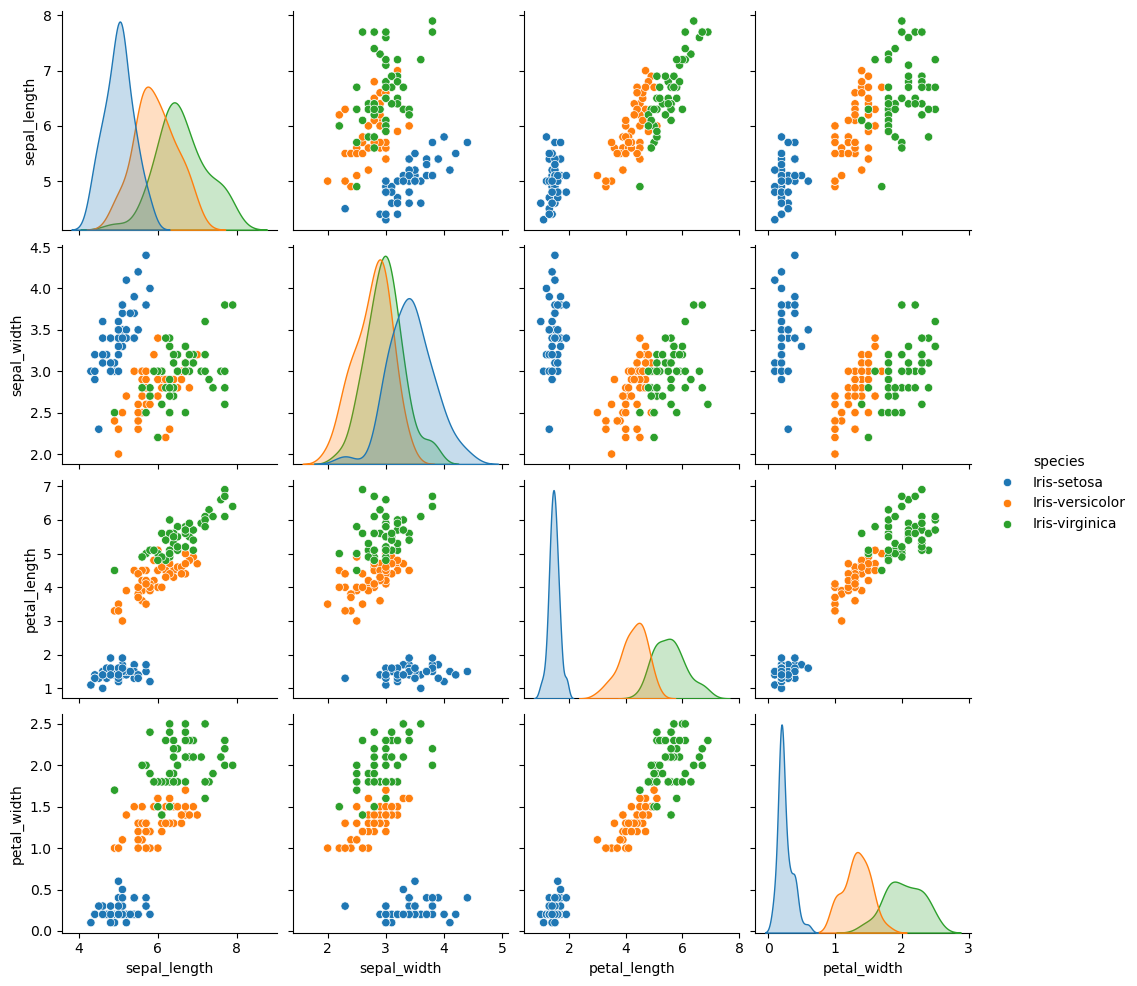

In [37]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='species')

Text(0.5, 1.0, 'Correlation Heatmap')

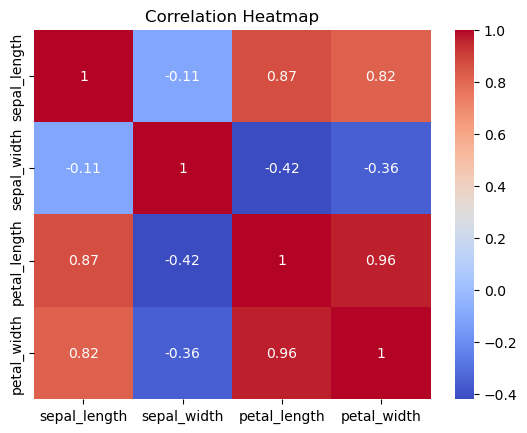

In [41]:
corr_matrix = df.iloc[:, :-1].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

C:\Users\Nihal\AppData\Local\Temp\ipykernel_14488\2272758610.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


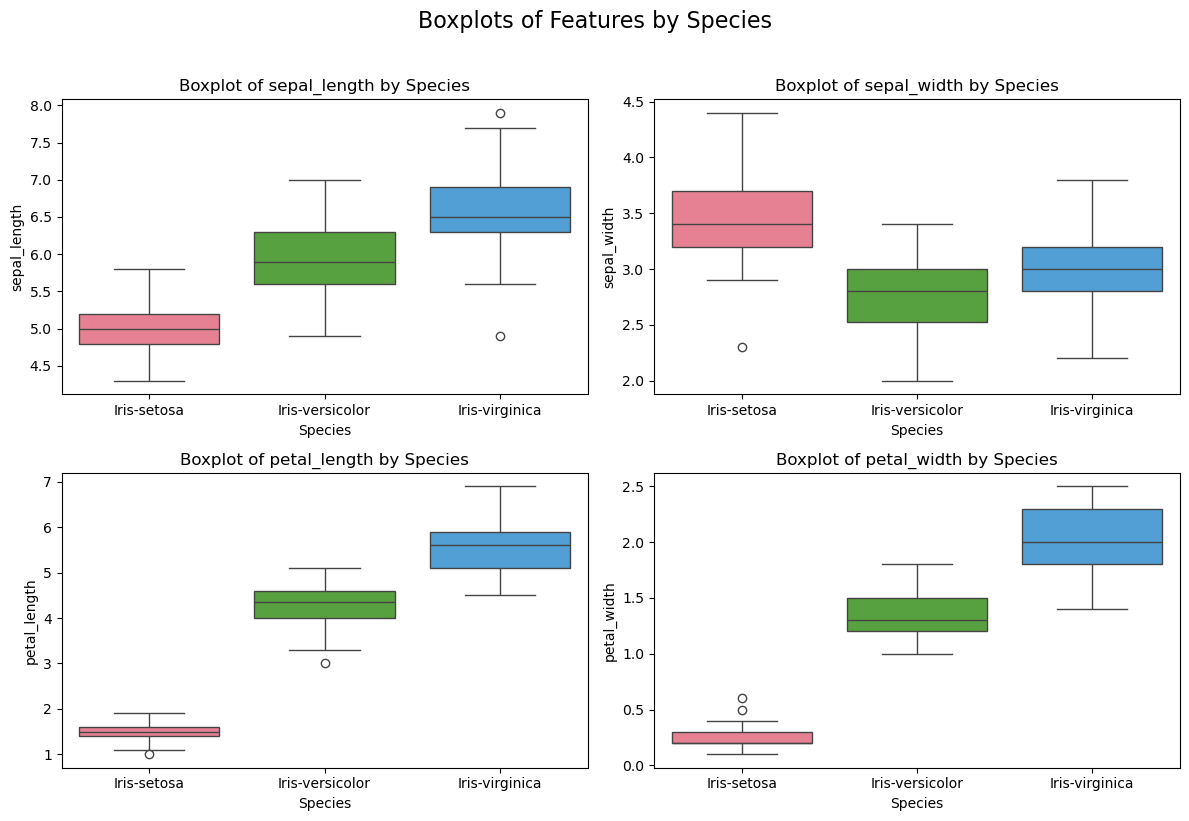

In [67]:
import math

columns = df.columns[:-1]
n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    for idx, column in enumerate(columns):
        sns.boxplot(x='species', y=column, data=df, ax=axes[idx], palette='husl', hue=None)
        axes[idx].set_title(f'Boxplot of {column} by Species')
        axes[idx].set_xlabel('Species')
        axes[idx].set_ylabel(column)
    
    for ax in axes[len(columns):]:
        ax.axis('off')

plt.suptitle('Boxplots of Features by Species', fontsize=16, y=1.02)
plt.tight_layout()

## Data Preprocessing

#### Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

# Encode species labels
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

#### Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df['species']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name}:\nAccuracy: {accuracy}\n")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")

Logistic Regression:
Accuracy: 0.9666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------------
Decision Tree:
Accuracy: 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

--------------------------------------------------------
Random Forest:
Accuracy: 0.9

C:\Users\Nihal\AppData\Local\Temp\ipykernel_14488\424584489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis', zorder=3)


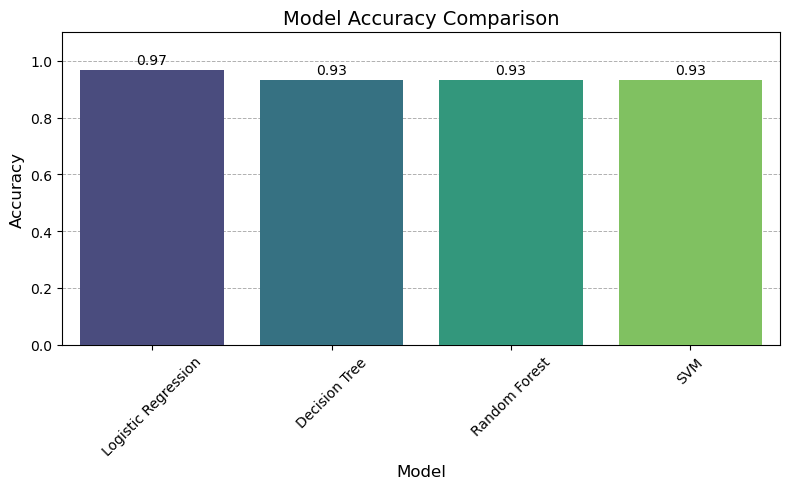

In [102]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis', zorder=3)

ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, zorder=0)
ax.set_axisbelow(True)

for i, value in enumerate(results.values()):
    ax.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

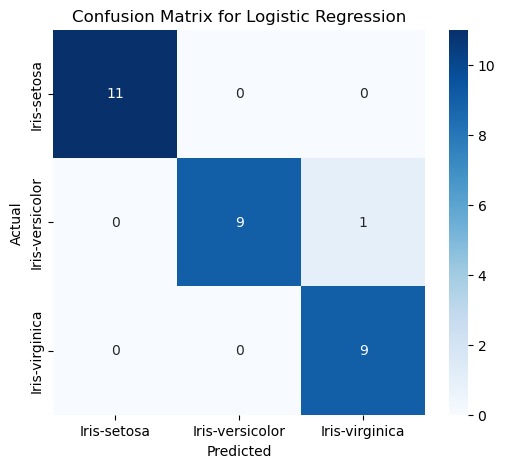

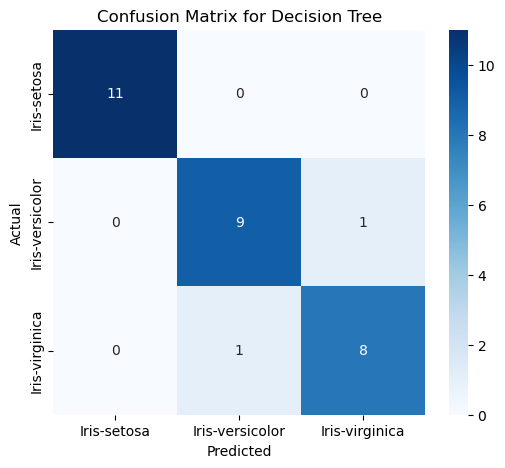

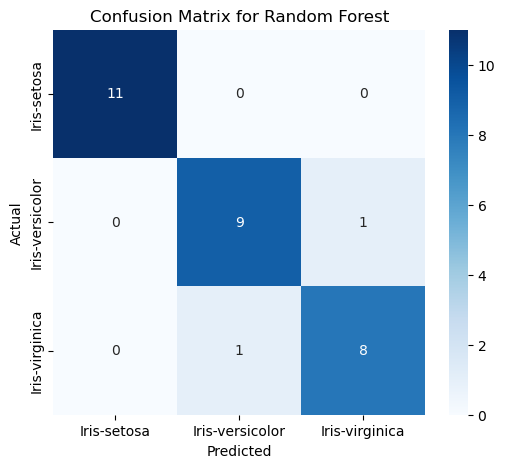

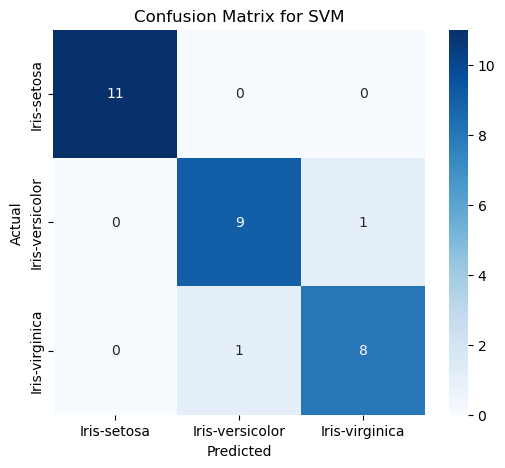

In [104]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [108]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [116]:
# Sample inputs for testing
sample_inputs = [
    [5.1, 3.5, 1.4, 0.2],  # Expected: Iris-setosa
    [6.7, 3.1, 4.7, 1.5],  # Expected: Iris-versicolor
    [7.2, 3.6, 6.1, 2.5]   # Expected: Iris-virginica
]

scaled_inputs = scaler.transform(sample_inputs)

predictions = log_reg.predict(scaled_inputs)

print("Predicted species for sample inputs:")
for i, prediction in enumerate(predictions):
    if prediction == 0:
        species_name = 'Iris-setosa'
    elif prediction == 1:
        species_name = 'Iris-versicolor'
    else:
        species_name = 'Iris-virginica'
    
    print(f"Sample {i+1} predicted as: {species_name}")

Predicted species for sample inputs:
Sample 1 predicted as: Iris-setosa
Sample 2 predicted as: Iris-versicolor
Sample 3 predicted as: Iris-virginica


E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
